# Supermarket Sales Analysis

This notebook presents an in-depth exploratory data analysis project on a dataset consisting of 54,808 employee records. The dataset encompasses various essential attributes, including employee demographics, department, region, education level, gender, recruitment channel, training history, age, previous year rating, length of service, KPIs met (>80%), awards won, average training score, and promotion status. The goal of this analysis is to uncover insights and patterns within the data, providing valuable information for HR departments and decision-makers in understanding employee dynamics and factors influencing promotion rates.

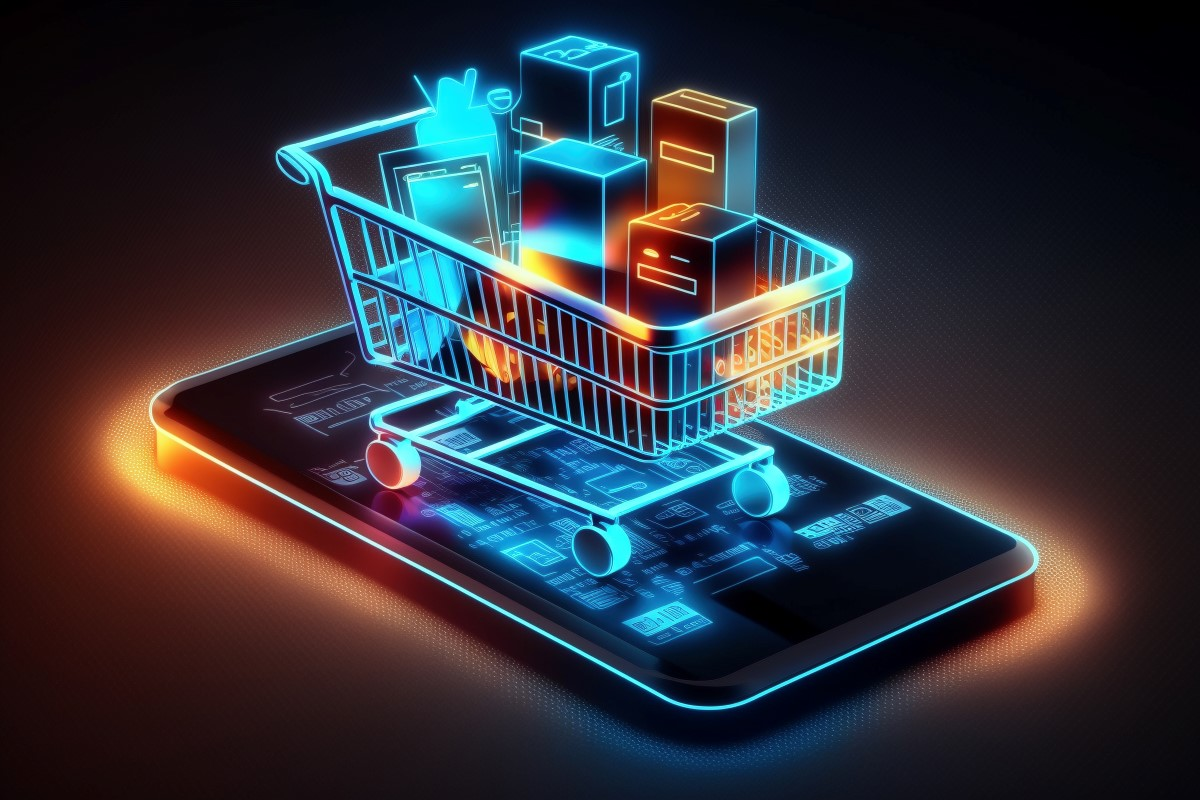

# The goal is to answer these questions

1-What is the distribution of sales across the three branches?

2-How does the sales revenue vary between different cities where the supermarkets are located?

3-Are there differences in purchasing behavior between members and non-members?

4-Is there a gender-based difference in the types of products purchased?

5-Which product line generates the highest revenue?

6-What is the most popular time of day for shopping?

7-Are there specific months when the sales peak?

8-What payment method is most commonly used by customers?

9-Is there a correlation between unit price and quantity purchased?

10-How does the cost of goods sold (COGS) vary between product lines?

11-What is the gross margin percentage for each branch?

12-Is there a relationship between the gross income and the rating given by customers?

13-How does the average rating vary for different product lines?

14-What is the distribution of ratings across different branches?

15-Is there a relationship between the total purchase amount and the customer rating?

16-How do the sales quantities vary between different product lines?

17-What is the average total purchase amount per city?

18-Are there specific days of the week that have higher sales?

19-How does the tax amount affect the total purchase price for different product lines?

20-Can you identify any trends in the data that suggest purchasing patterns or seasonality?

# 

# 

In [2]:
#Importing The Modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading Data
df=pd.read_csv(r"K:\Kaggle data sets\supermarket_sales - Sheet1.csv")

In [5]:
#taking a snapchot of data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#Statistics matrix of dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
#data set dimensions
df.shape

(1000, 17)

In [11]:
#dataset Columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# 

# Data Handeling

In [10]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### 1-dtype of "date" column must be changed to date 

In [18]:
df.Date=pd.to_datetime(df.Date)

In [19]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

#### Done ✓✓

### 2- Handeling Null Values if there are any

In [21]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

###### Thus there are no null values but we will do the process as if there was for revesion

In [27]:
#get the average value of the column
avg_Unit_price= df["Unit price"].mean()    

#replace the "imaginary" Null Values with the avg_Unit_price that we obtained
df["Unit price"].replace(np.nan ,avg_Unit_price,inplace=True)

In [30]:
#fill the other "imaginary" Null values with the next cell values
df.fillna(method= "ffill")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


### 3-Resetting the index

In [36]:
df.set_index('Invoice ID',inplace =True)

### 4-Obtaining The Correlation Matrix

In [52]:
df.corr()

C:\Users\karee\AppData\Local\Temp\ipykernel_2852\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [38]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
selected_columns = ['Unit price', 'Quantity', 'Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']
df[selected_columns].corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


###### The correlation output of the "gross margin percentage" column is too small to be put in table so it's put as a NaN value

# 

# Analysis phase (answering the previouse questions):

In [55]:
#Setting the style of the plots
plt.style.use("seaborn")

C:\Users\karee\AppData\Local\Temp\ipykernel_2852\895584350.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### Visualization of the correlation matrix

In [1]:
sns.heatmap(df.corr(),annot=True)

NameError: name 'sns' is not defined

### 1-What is the distribution of sales across the three branches?


Text(0.5, 1.0, 'The Branches Sales Distribution')

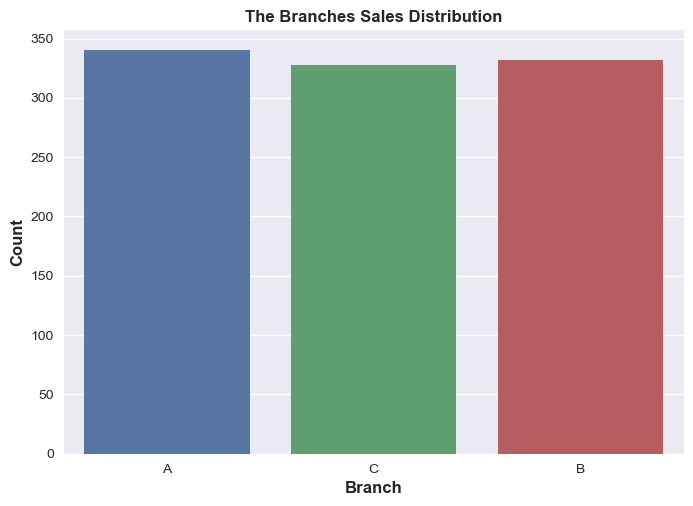

In [64]:
sns.countplot(x="Branch",data=df)
plt.xlabel("Branch",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=90)
plt.title("The Branches Sales Distribution",fontdict={'size': 12, 'weight': 'bold'})

### 2-How does the sales revenue vary between different cities where the supermarkets are located?


Text(0.5, 1.0, 'Sales Revenue Variation by City')

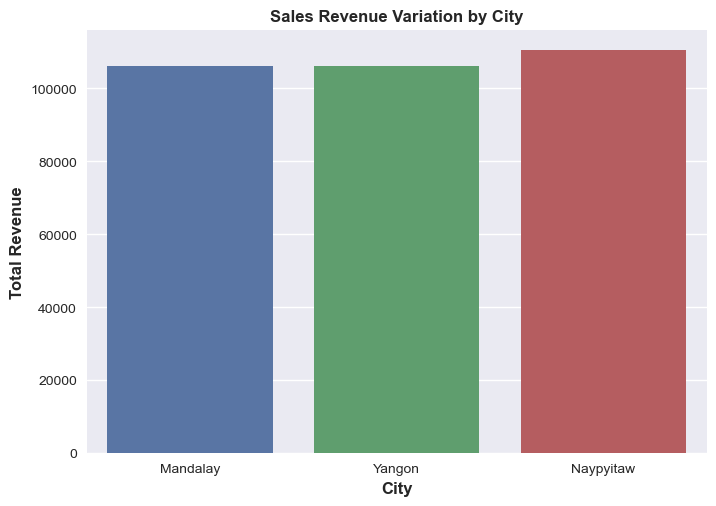

In [89]:
x=df.groupby("City")["Total"].sum().sort_values().index
y=df.groupby("City")["Total"].sum().sort_values()
sns.barplot(x=x,y=y,data=df,)

plt.xlabel("City",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Total Revenue",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=90)
plt.title("Sales Revenue Variation by City",fontdict={'size': 12, 'weight': 'bold'})

Text(0.5, 1.0, 'Avg Sales Revenue Variation by City')

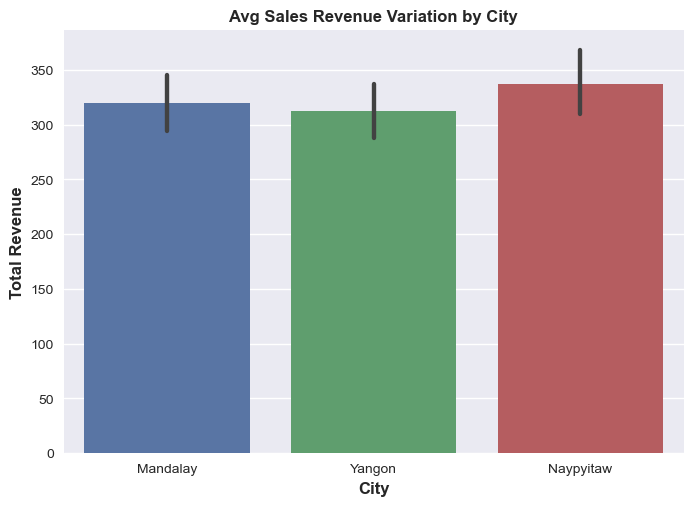

In [91]:
sns.barplot(x="City",y="Total",data=df,order=["Mandalay","Yangon","Naypyitaw"])

plt.xlabel("City",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Total Revenue",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=90)
plt.title("Avg Sales Revenue Variation by City",fontdict={'size': 12, 'weight': 'bold'})

### 3-Are there differences in purchasing behavior between members and non-members?


the number of Customers that are members is    : 501
the number of Customers that are Not members is: 499


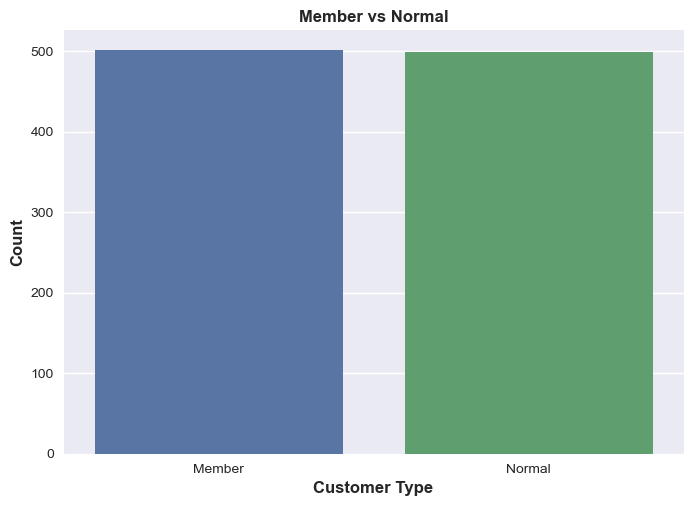

In [102]:
sns.countplot(x="Customer type",data=df )

plt.xlabel("Customer Type",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=90)
plt.title("Member vs Normal",fontdict={'size': 12, 'weight': 'bold'})


Member,Normal =df["Customer type"].value_counts()
print("the number of Customers that are members is    :",Member)
print("the number of Customers that are Not members is:",Normal)
plt.show()

### 4-Is there a gender-based difference in the types of products purchased?


Text(0.5, 1.0, 'Difference Between Female And Male Purchases')

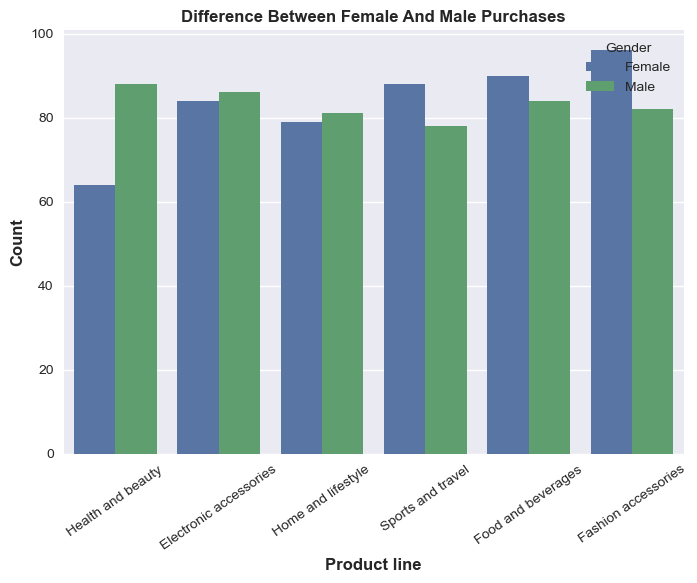

In [116]:
sns.countplot(x="Product line",data=df ,hue="Gender")
plt.xlabel("Product line",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Difference Between Female And Male Purchases",fontdict={'size': 12, 'weight': 'bold'})


### 5-Which product line generates the highest revenue?


the total revenue generated by 'Health and beauty'    products is :49193.739
the total revenue generated by 'Home and lifestyle'    products is :53861.913
the total revenue generated by 'Fashion accessories'    products is :54305.895
the total revenue generated by 'Electronic accessories'    products is :54337.5315
the total revenue generated by 'Sports and travel'    products is :55122.8265
the total revenue generated by 'Food and beverages'    products is :56144.844


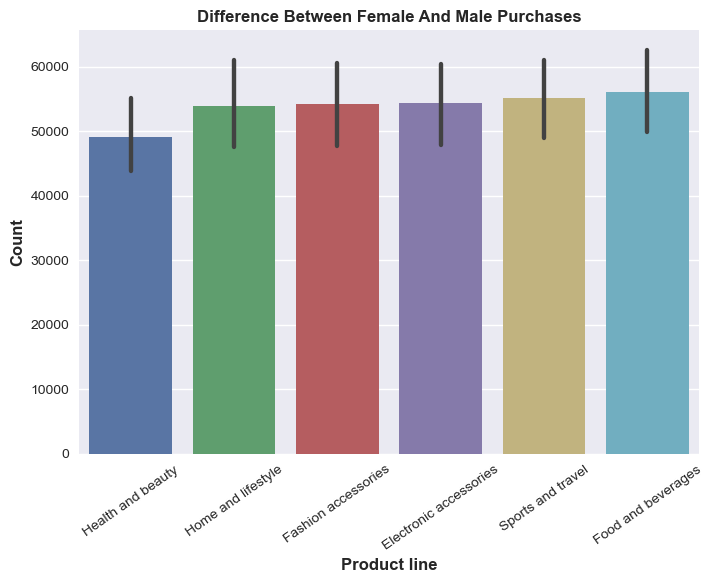

In [184]:
sns.barplot(x="Product line",y="Total",data=df ,estimator="sum" ,order=['Health and beauty',
 'Home and lifestyle',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Food and beverages'] )
plt.xlabel("Product line",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Difference Between Female And Male Purchases",fontdict={'size': 12, 'weight': 'bold'})


b =df.groupby("Product line")["Total"].sum().sort_values()
for Product, count in b.items():
    print(f"the total revenue generated by '{Product}'    products is :{count}")
    
plt.show()

### 6-What is the most popular time of day for shopping?


 <The most popular time of the day is 7 o'clock as there is 113 orders purchased at that time.>
There are 113 orders made at 19o'clock.
There are 103 orders made at 13o'clock.
There are 102 orders made at 15o'clock.
There are 101 orders made at 10o'clock.
There are 93 orders made at 18o'clock.
There are 90 orders made at 11o'clock.
There are 89 orders made at 12o'clock.
There are 83 orders made at 14o'clock.
There are 77 orders made at 16o'clock.
There are 75 orders made at 20o'clock.
There are 74 orders made at 17o'clock.


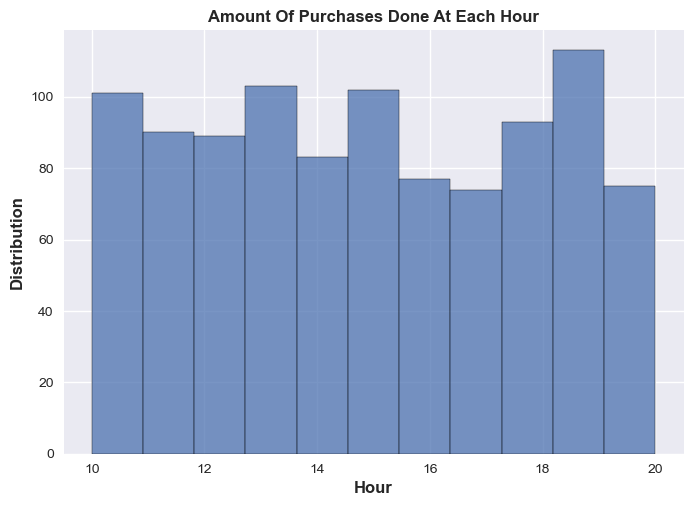

In [198]:
#We extract the hour part of the "Time" Column in a new column called "Hour"
df["Hour"]=pd.to_datetime(df["Time"]).dt.hour
#Plot the distribution of the Hours using the new column we obtained 
sns.histplot(x="Hour",data=df)

plt.xlabel("Hour",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Amount Of Purchases Done At Each Hour",fontdict={'size': 12, 'weight': 'bold'})

#Print some output statements
a= df.Hour.value_counts()

print(" <The most popular time of the day is 7 o'clock as there is 113 orders purchased at that time.>")
for hour, count in a.items():
    print(f"There are {count} orders made at {hour}o'clock.")

### 7-Are there specific months when the sales peak?


There are 352 orders made at January.
There are 345 orders made at march.
There are 303 orders made at February.


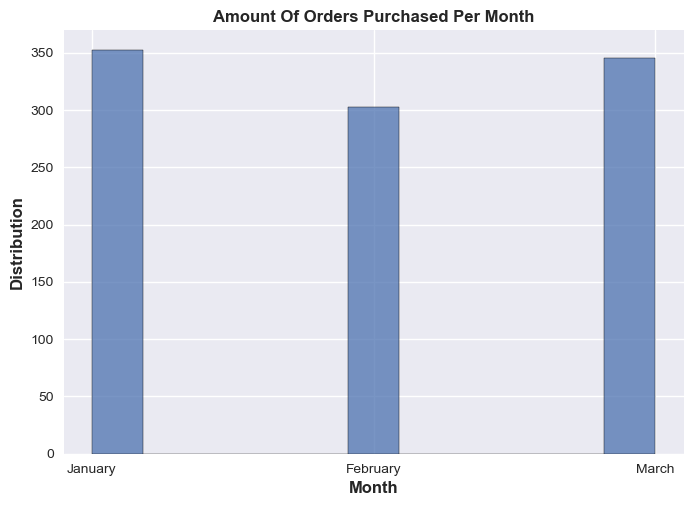

In [344]:
#First we create a new column with the "Month" whose values are taken from the "Date" Column
df["Month"]=df.Date.dt.month
c=df.Month.value_counts()

#plot the barchart
sns.histplot(x="Month",data=df,)
plt.xticks([1,2,3], ['January', 'February',"March"])

plt.xlabel("Month",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Amount Of Orders Purchased Per Month",fontdict={'size': 12, 'weight': 'bold'})

#Print some output statements
for month, count in c.items():
    if  month ==1:
        month ="January"
    elif month ==2:
        month ="February"
    elif month ==3:
        month ="march"
    print(f"There are {count} orders made at {month}.")

### 8-What payment method is most commonly used by customers?


Text(0.5, 1.0, 'Payment Method Distribution')

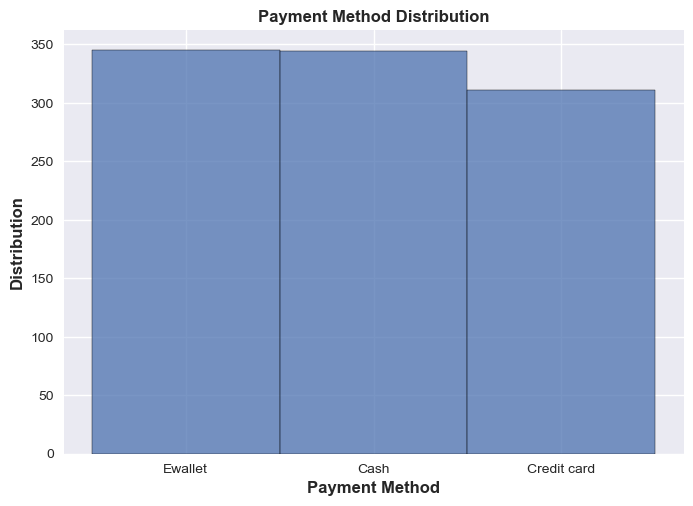

In [208]:
sns.histplot(x="Payment",data=df)

plt.xlabel("Payment Method",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Payment Method Distribution",fontdict={'size': 12, 'weight': 'bold'})

### 9-Is there a correlation between unit price and quantity purchased?


No,There's no Correlation


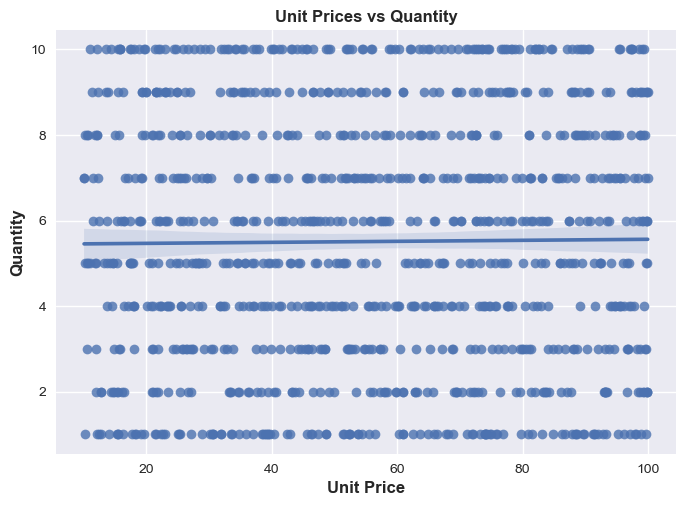

In [233]:
sns.regplot(x="Unit price",y="Quantity",data=df)

plt.xlabel("Unit Price",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Quantity",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Unit Prices vs Quantity",fontdict={'size': 12, 'weight': 'bold'})


print("No,There's no Correlation")

### 10-How does the cost of goods sold (COGS) vary between product lines?


Text(0.5, 1.0, 'COGS Per Product Line')

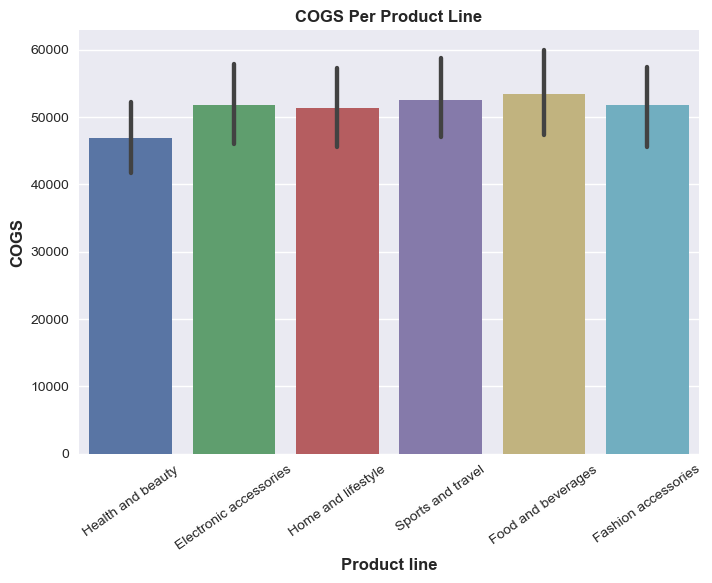

In [222]:
sns.barplot( y="cogs" ,x="Product line",data=df,estimator="sum")

plt.ylabel("COGS",fontdict={'size': 12, 'weight': 'bold'})
plt.xlabel("Product line",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("COGS Per Product Line",fontdict={'size': 12, 'weight': 'bold'})

### 11-What is the gross margin percentage for each branch?



Text(0.5, 1.0, 'Branch Gross Margin Percentage')

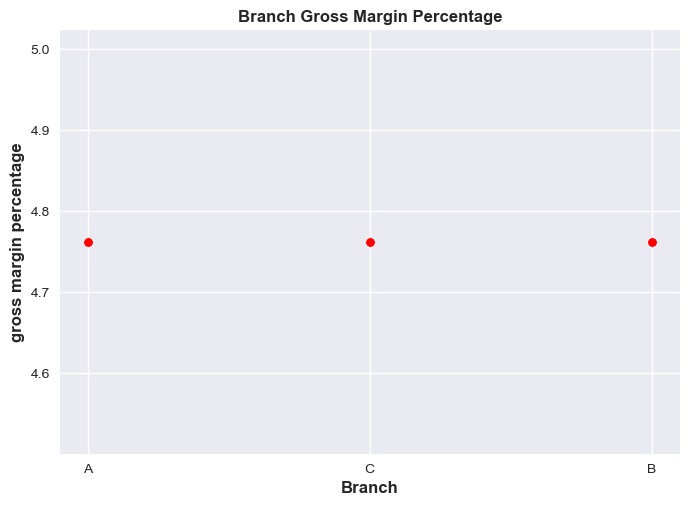

In [241]:
sns.scatterplot(x="Branch",y="gross margin percentage",data=df,color="r")

plt.xlabel("Branch",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("gross margin percentage",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Branch Gross Margin Percentage",fontdict={'size': 12, 'weight': 'bold'})

### 12-Is there a relationship between the gross income and the rating given by customers?

Text(0.5, 1.0, 'Rating vs Gross Income')

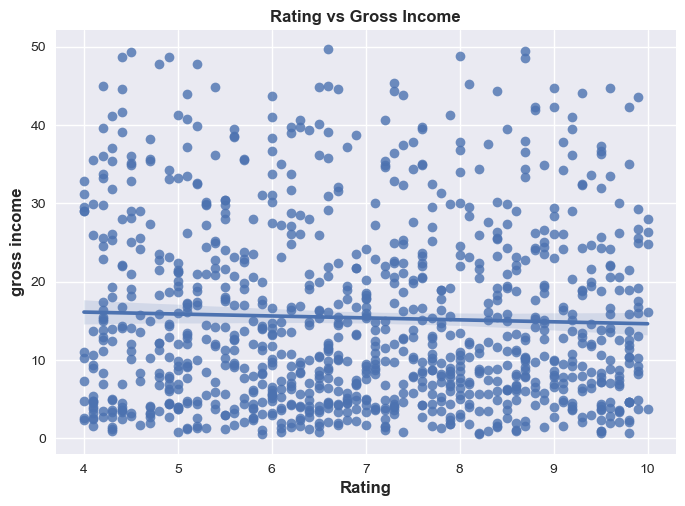

In [242]:
sns.regplot(x="Rating",y="gross income",data=df)

plt.xlabel("Rating",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("gross income",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Rating vs Gross Income",fontdict={'size': 12, 'weight': 'bold'})

Text(0.5, 1.0, 'Rating vs Gross Income')

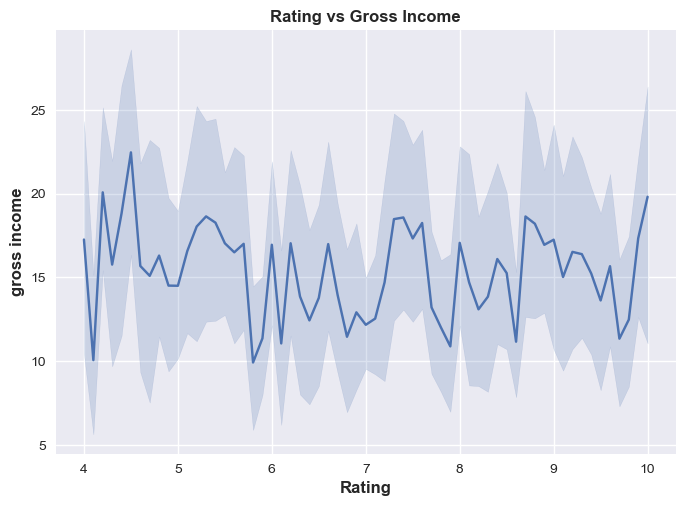

In [243]:
sns.lineplot(x="Rating",y="gross income",data=df)
plt.xlabel("Rating",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("gross income",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Rating vs Gross Income",fontdict={'size': 12, 'weight': 'bold'})

### 13-How does the average rating vary for different product lines?


6.9 is the avg rating for 'Electronic accessories'.
7.0 is the avg rating for 'Fashion accessories'.
7.1 is the avg rating for 'Food and beverages'.
7.0 is the avg rating for 'Health and beauty'.
6.8 is the avg rating for 'Home and lifestyle'.
6.9 is the avg rating for 'Sports and travel'.


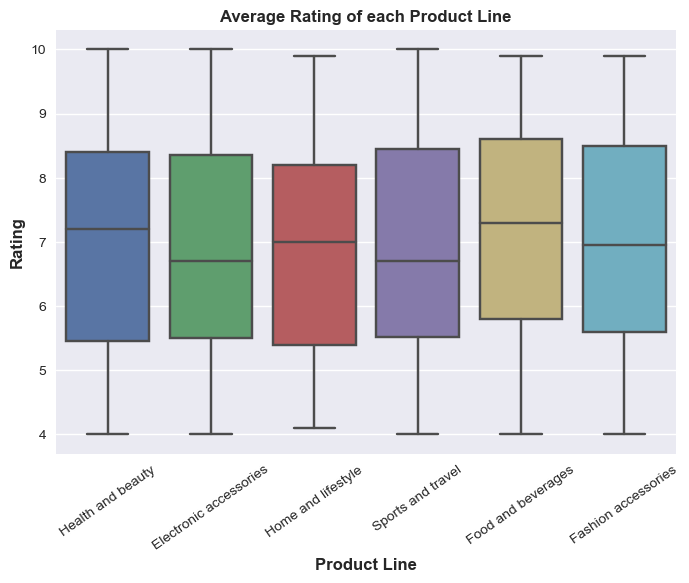

In [283]:
sns.boxplot(x="Product line",y="Rating",data=df)



plt.xlabel("Product Line",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Rating",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Average Rating of each Product Line",fontdict={'size': 12, 'weight': 'bold'})

#print some statements
e=df.groupby("Product line")['Rating'].mean()
for pline, avg in e.items():
    print(f"{avg:.1f} is the avg rating for '{pline}'.")
    

### 14-What is the distribution of ratings across different branches?


Text(0.5, 1.0, 'distribution of ratings across different branches')

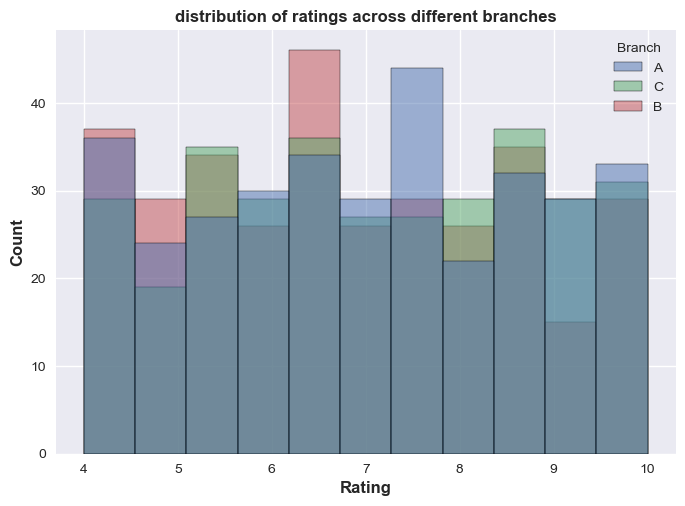

In [270]:
sns.histplot(x="Rating",hue="Branch",data=df)

plt.xlabel("Rating",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("distribution of ratings across different branches",fontdict={'size': 12, 'weight': 'bold'})


In [271]:
#df.groupby("Rating")["Branch"].value_counts()

Text(0.5, 1.0, 'distribution of ratings across different branches')

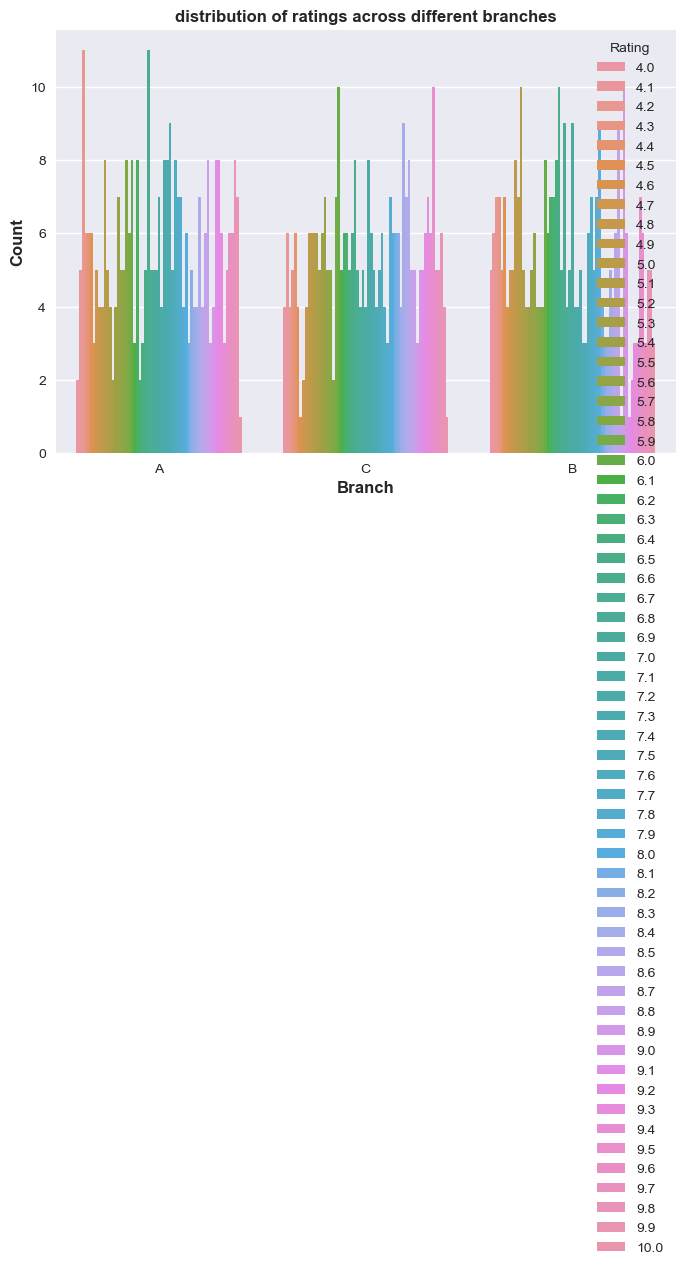

In [266]:
sns.countplot(hue="Rating",x="Branch",data=df,dodge=True)

plt.xlabel("Branch",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("distribution of ratings across different branches",fontdict={'size': 12, 'weight': 'bold'})

### 15-Is there a relationship between the total purchase amount and the customer rating?


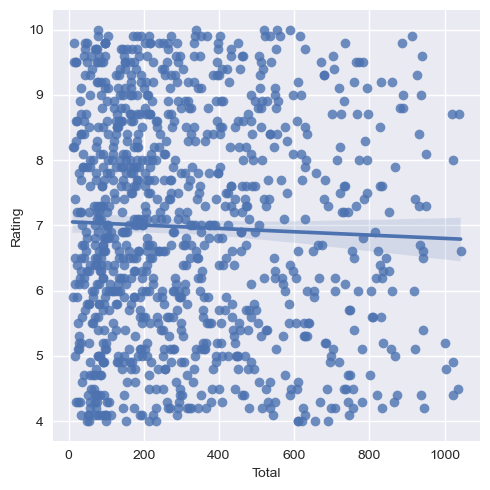

In [272]:
sns.lmplot(x="Total",y="Rating",data=df)

plt.xlabel("Total Purchase",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Rating",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Total Purchase vs Rating",fontdict={'size': 12, 'weight': 'bold'})

### 16-How do the sales quantities vary between different product lines?


Text(0.5, 1.0, 'Quantities Variations Between Different Product Lines')

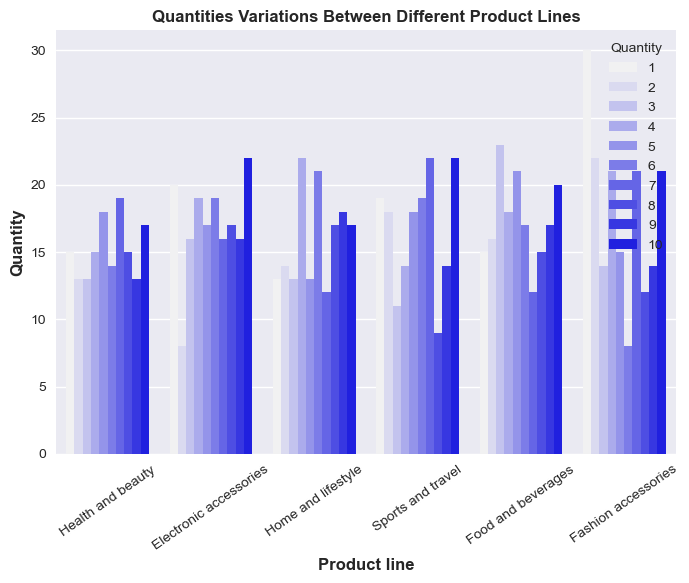

In [280]:
sns.countplot(x="Product line",hue="Quantity",data=df,color="b")

plt.xlabel("Product line",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Quantity",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Quantities Variations Between Different Product Lines",fontdict={'size': 12, 'weight': 'bold'})

### 17-What is the average total purchase amount per city?


<Axes: xlabel='City', ylabel='Total'>

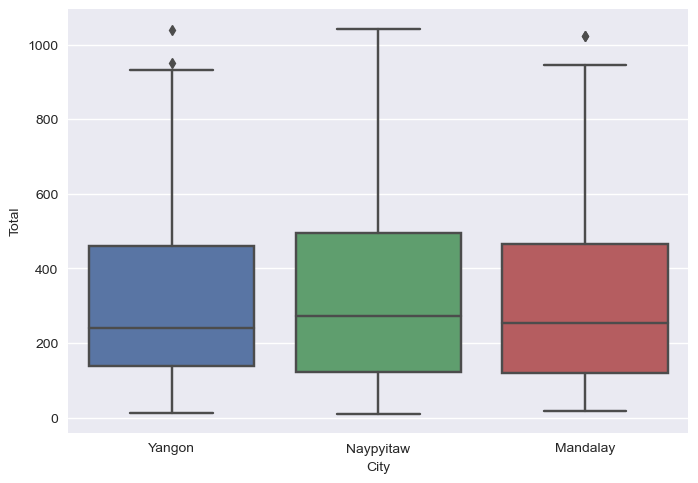

In [282]:
sns.boxplot(x="City",y="Total",data=df)

plt.xlabel("City",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Total",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)
plt.title("Avg Total Purchase Per City",fontdict={'size': 12, 'weight': 'bold'})

### 18-Are there specific days of the week that have higher sales?


the day with the most Total Revenue is 15th of each month


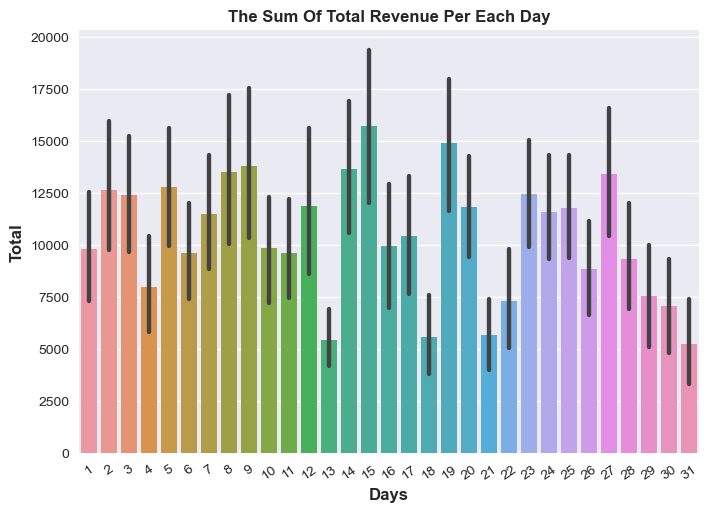

In [297]:
#getting the Data of days (Redundant)
df["Days"]=df.Date.dt.day

#plot the barplot
sns.barplot(x="Days" ,y="Total",data=df,estimator=sum)

#aesthetics
plt.xlabel("Days",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Total",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("The Sum Of Total Revenue Per Each Day",fontdict={'size': 12, 'weight': 'bold'})

#print some statements
print("the day with the most Total Revenue is 15th of each month")

### 19-How does the tax amount affect the total purchase price for different product lines?


Text(15.375000000000002, 0.5, 'Total')

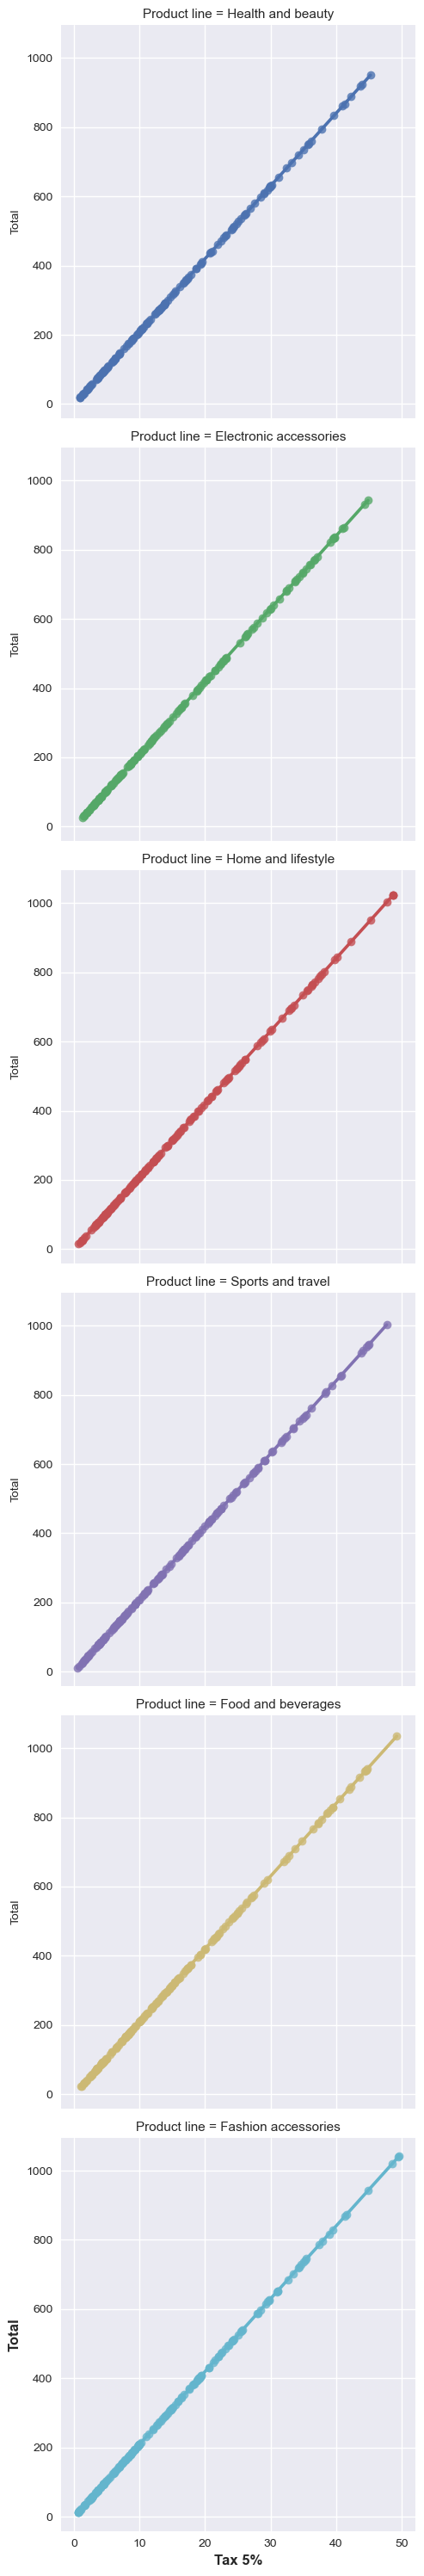

In [309]:
sns.lmplot(x="Tax 5%",y="Total",row="Product line",hue="Product line",data=df)

#aesthetics
plt.xlabel("Tax 5%",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Total",fontdict={'size': 12, 'weight': 'bold'})
#plt.xticks(rotation=35)

### 20-Can you identify any trends in the data that suggest purchasing patterns or seasonality?

In [337]:
df['Year'] = df['Date'].dt.year


It shows that the year of 2019 started with a huge peak at january then there was dip in February and somewhat of a peak in march


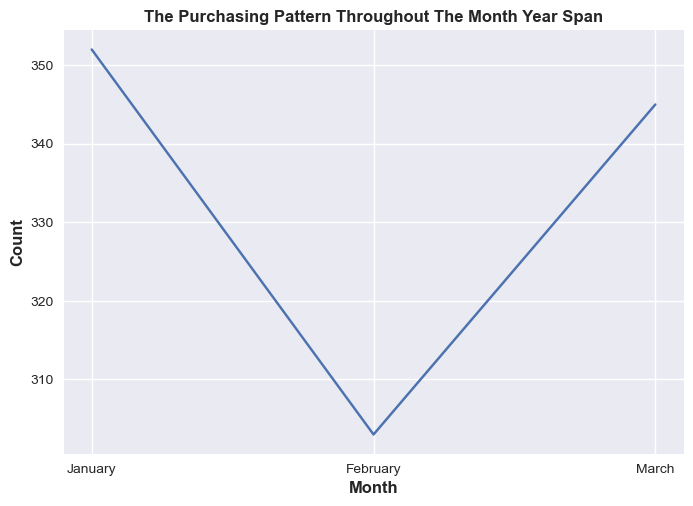

In [350]:
#Redundant step
df['Year'] = df['Date'].dt.year

#np.size=count meaning that i want to get how many time each month has been mentioned in the dataset
#it doesn't mater what column i use in y because all i want is the number of occurences"the count of times that a certain month was mentioned in the data set" and any column will give me the same reason 
sns.lineplot(x="Month",y="Total",data=df,estimator=np.size,markers="x")


#aesthetics
plt.xticks([1,2,3], ['January','February',"March"])
plt.xlabel("Month",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Count",fontdict={'size': 12, 'weight': 'bold'})
plt.title("The Purchasing Pattern Throughout The Month Year Span",fontdict={'size': 12, 'weight': 'bold'})

print("It shows that the year of 2019 started with a huge peak at january then there was dip in February and somewhat of a peak in march")